In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
os.listdir()

['exploratory.ipynb', '1Скважина.ipynb', '.ipynb_checkpoints']

In [3]:
data1_x = pd.read_csv("../data/preprocessed/aktobe120.csv", header=None)
data1_y = pd.read_csv("../data/preprocessed/aktobe120Y.csv", header=None)
print(data1_x.shape)
print(data1_y.shape)

data2_x = pd.read_csv("../data/preprocessed/moldabek2737.csv", header=None)
data2_y = pd.read_csv("../data/preprocessed/moldabek2737Y.csv", header=None)
print(data2_x.shape)
print(data2_y.shape)


(61, 11)
(13, 7)
(51, 11)
(51, 7)


In [4]:
data1_y[0] = data1_y[0].str.replace(",", "").astype(float)
# data2_y[0] = data2_y[0].str.replace(",", "").astype(float)


In [5]:
df1 = pd.merge_asof(data1_x, data1_y, on=0, direction="nearest")
df2 = pd.merge_asof(data2_x, data2_y, on=0, direction="nearest")


In [6]:
df = pd.concat((df1, df2), axis=0)
df = df.sort_values(0)
df = df1

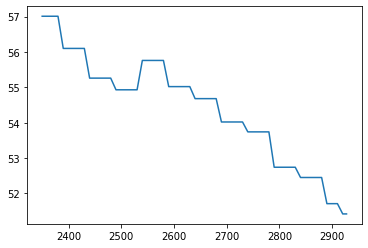

In [7]:
targets = ["1_y" ,"2_y" ,"3_y" ,"4_y" ,"5_y" ,"6_y"]
plt.plot(df[0], df["4_y"])

In [8]:
df1 = df1.iloc[:, 1:]
df1

,1_x,2_x,3_x,4_x,5_x,6_x,7,8,9,10,1_y,2_y,3_y,4_y,5_y,6_y
0,77.447,19.455,2235.319,2217.951,255.782,95.891,5089710.282,9691519.581,5.0,273.15,59.80,71.92,59.40,57.01,52.06,132.07
1,79.072,19.082,2237.354,2219.986,265.024,99.122,5089719.524,9691522.812,5.0,282.94,59.80,71.92,59.40,57.01,52.06,132.07
2,80.699,18.712,2239.110,2221.742,274.338,102.310,5089728.838,9691526.000,5.0,292.79,59.80,71.92,59.40,57.01,52.06,132.07
3,82.326,18.346,2240.586,2223.218,283.716,105.453,5089738.216,9691529.143,5.0,302.67,59.80,71.92,59.40,57.01,52.06,132.07
4,83.953,17.982,2241.781,2224.412,293.149,108.548,5089747.649,9691532.238,5.0,312.60,59.19,72.11,59.23,56.10,54.22,131.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,90.000,20.110,2243.739,2226.371,763.522,277.730,5090218.022,9691701.420,0.0,812.46,54.95,76.60,59.36,51.71,51.11,132.62
57,90.000,20.110,2243.739,2226.371,772.912,281.168,5090227.412,9691704.858,0.0,822.46,54.95,76.60,59.36,51.71,51.11,132.62
58,90.000,20.110,2243.739,2226.371,782.302,284.606,5090236.802,9691708.296,0.0,832.46,54.95,76.60,59.36,51.71,51.11,132.62
59,90.000,20.110,2243.739,2226.371,791.693,288.045,5090246.193,9691711.735,0.0,842.46,54.66,76.74,59.27,51.42,50.41,132.59


In [50]:
from lazypredict.Supervised import LazyRegressor

In [9]:
# pipe = make_pipeline(StandardScaler(),  PolynomialFeatures(degree=2))

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :10], df.iloc[:,11:],test_size=.2,shuffle=False)
# clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)
# print(models)

In [10]:
from sklearn.linear_model import RANSACRegressor, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
reg = make_pipeline(StandardScaler(),  PolynomialFeatures(degree=2),  Lasso(alpha=0.05))

reg.fit(X_train, y_train)

/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.080e-02, tolerance: 1.047e-02
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.05))])

In [11]:
predictions = reg.predict(X_test)

/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


InvalidIndexError: (slice(None, None, None), None)

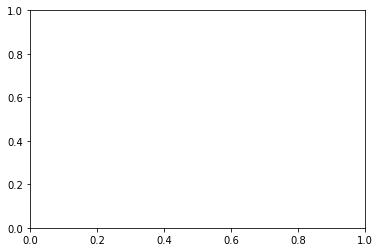

In [12]:
plt.plot(X_train[0], y_train)
plt.plot(X_test[0], y_test, c="red")
plt.plot(X_test[0], predictions, c="green")

In [15]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RANSACRegressor, Ridge, Lasso
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import TweedieRegressor
estimators = [
#     ("xtr", ExtraTreesRegressor()),
    ("lasso", make_pipeline(StandardScaler(),  PolynomialFeatures(degree=2),  Lasso(alpha=0.01))),
#     ("hist", HistGradientBoostingRegressor()),
    ("svr", make_pipeline(StandardScaler() ,SVR(kernel="poly"))), 
#     ("ransac", make_pipeline(StandardScaler(),  PolynomialFeatures(degree=2),  RANSACRegressor())),
#     ("lgbm", LGBMRegressor(verbose=-1)),
    ("xgb", make_pipeline(StandardScaler(),  PolynomialFeatures(degree=2), XGBRegressor()) ),
    ("twe", make_pipeline(StandardScaler(),  PolynomialFeatures(degree=2),  TweedieRegressor(power=1)))
]

model = StackingRegressor(estimators)
multi_output_model = MultiOutputRegressor(model)

In [16]:
multi_output_model.fit(X_train, y_train)

/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/

/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/

/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/

/home/beket/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.724e-03, tolerance: 6.704e-04
  model = cd_fast.enet_coordinate_descent(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings.

/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only suppor

/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/

/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/

/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/

/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MultiOutputRegressor(estimator=StackingRegressor(estimators=[('lasso',
                                                              Pipeline(steps=[('standardscaler',
                                                                               StandardScaler()),
                                                                              ('polynomialfeatures',
                                                                               PolynomialFeatures()),
                                                                              ('lasso',
                                                                               Lasso(alpha=0.01))])),
                                                             ('svr',
                                                              Pipeline(steps=[('standardscaler',
                                                                               StandardScaler()),
                                                                             

In [18]:
predictions = multi_output_model.predict(X_test)

/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/beket/

In [19]:
predictions.shape

(13, 6)

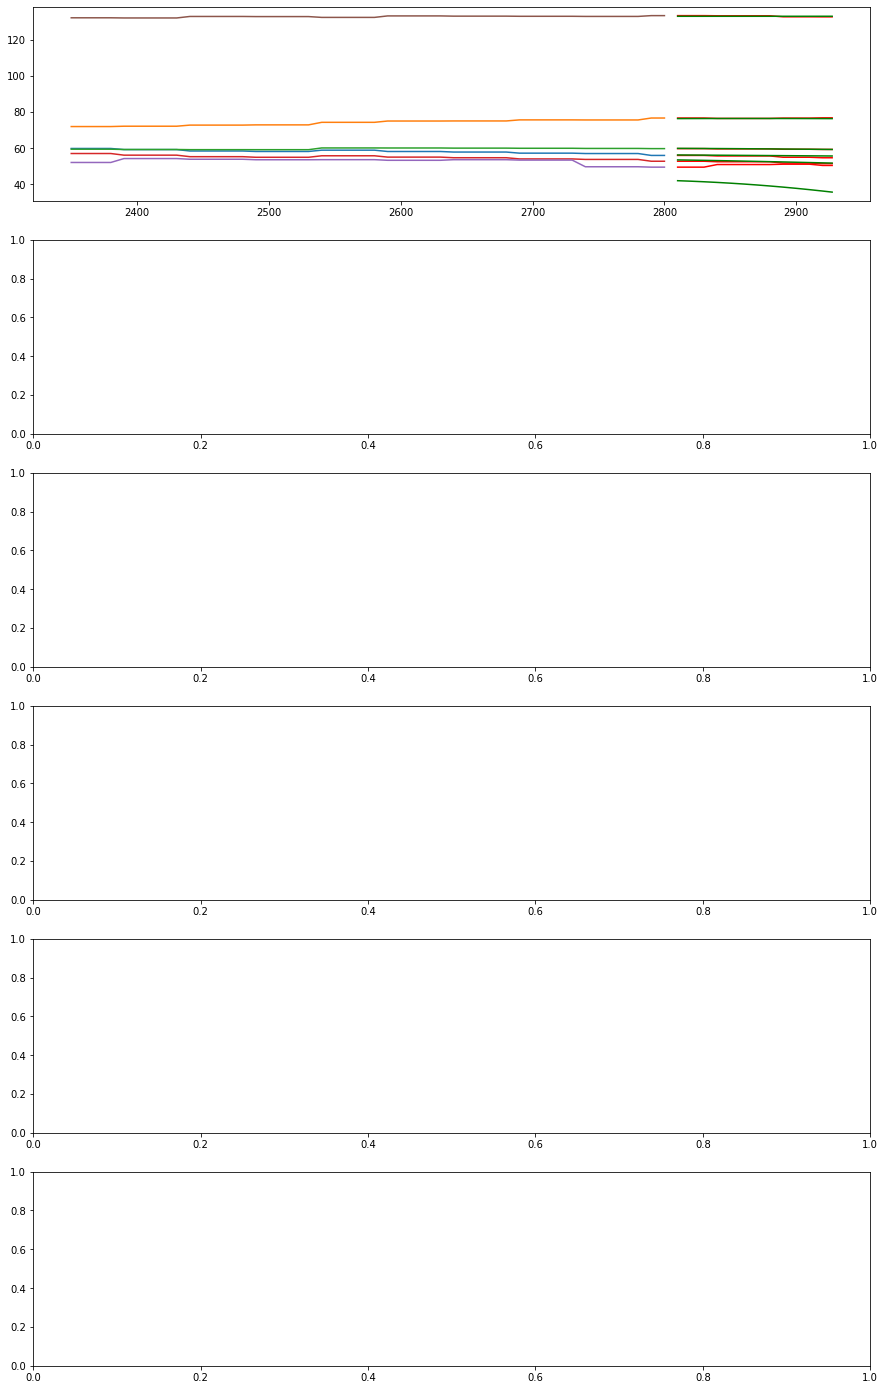

In [20]:
fig, ax = plt.subplots(6, 1, figsize=(15, 25))

for i in range(6):
    ax[0].plot(X_train[0], y_train.iloc[:, i])
    ax[0].plot(X_test[0], y_test.iloc[:, i], c="red")
    ax[0].plot(X_test[0], predictions[:, i], c="green")

В один график все.